In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GEX

In [2]:
clusts = open('../../data/ref/cluster_list.txt').read().split('\n')

In [3]:
test_types = !ls ../../data/outputs/gex_de_results/

In [4]:
def list_intersection(to_intersect):
    common = to_intersect[0]
    for item in to_intersect[1:]:
        common = np.intersect1d(common, item)
    return common

In [5]:
tests = ['lrt']

In [6]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [7]:
in_f = "../../data/outputs/atac_de_results/{0}_origin/{4}/{1}_v_{2}_{3}.tsv"

In [8]:
out_f = '../../data/outputs/atac_de_results/{0}_origin/{3}/aggregate/{1}_v_{2}_logfc.tsv'

# aggregate fold change PEAKS

In [9]:
spec_use = species + ['all']

In [10]:
for origin in species:
    for test in tests:
        outdir = '../../data/outputs/atac_de_results/{0}_origin/{1}/aggregate'.format(origin, test)
        !mkdir -p $outdir
        for spec1 in species:
            for spec2 in spec_use:
                if spec1 == spec2:
                    continue
                dfs = []
                for clust in clusts:
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    dfs.append(dat['logFC'])
                    # !wc -l $f_use
                df_out = pd.concat(dfs, axis=1)
                df_out.columns = clusts
                df_out.to_csv(out_f.format(origin, spec1, spec2, test), sep='\t')

# count and visualize peaks/cell

# may update later for great? seems like too much of a pain though

In [9]:
out_go_pair = '../../data/processed/da_peak_list/{0}_origin/pairwise/{0}_v_{1}_{2}_{3}_test_{4}.txt'
out_go_specific = '../../data/processed/da_peak_list/{0}_origin/{1}_spec_{2}_{3}.txt'

In [10]:
def save_list(outfile, listlike):
    '''
    writes a file as a newline seperated list, useful for gsea, or storing information in general
    
    args:
        outfile : a file path to write a list of genes
        listline : an interatable object like a python list, or a numpy array
    
    
    '''
    return open(outfile, 'w').write(''.join([i + '\n' for i in listlike]).strip('\n'))

In [11]:
def subset_orthologs(df_, ortholog_table, specie):
    df_use = df_.reindex(ortholog_table[specie])
    df_use.index = ortholog_table['human']
    return df_use

In [14]:
# percent_path = '../../data/processed/atac_percent_accesible/' + origin + '_origin/{}/all_percent_aggregate.tsv'

In [15]:
# pd.read_csv(percent_path.format('human'), sep='\t').max()

In [35]:
fdr_thresh = .01/(21 * 6) #.01/n_cell_types/n pairwise comparisons
nums = []
for origin in ['human']:
    orthologs = pd.read_csv('../../data/ref/ortholog_elements/{}_origin_ortholog_elements.tsv'.format(origin), sep='\t')
    outdir = '../../data/processed/da_peak_list/{0}_origin/'.format(origin)
    !mkdir -p {outdir} {outdir}/pairwise
    for test in tests:
        for clust in clusts:
            for spec1 in species:
                spec_list_up = []
                spec_list_down = []
                spec_list_mixed = []
                # spec1_percent = percent_expressed[spec1][clust]
                for spec2 in species:
                    # print(spec1, spec2)
                    if spec1 == spec2:
                        continue
                    # spec2_percent = percent_expressed[spec2][clust]
                    
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    sig_up = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC > 1)].values.tolist()
                    sig_down = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC < -1)].values.tolist()
                    spec_list_up.append(sig_up)
                    spec_list_down.append(sig_down)
                    spec_list_mixed.append(sig_up + sig_down)

                species_spec_up = list_intersection(spec_list_up)
                species_spec_down = list_intersection(spec_list_down)
                species_spec_mixed = np.setdiff1d(np.setdiff1d(list_intersection(spec_list_mixed),
                                                  species_spec_up),
                                                  species_spec_down)
                # save_list(out_go_specific.format(origin, spec1, clust, 'up'), species_spec_up)
                # save_list(out_go_specific.format(origin, spec1, clust, 'down'), species_spec_down)
                # save_list(out_go_specific.format(origin, spec1, clust, 'mixed'), species_spec_mixed)
                print(spec1)
                nums.append([clust, origin, spec1, test, len(species_spec_up), len(species_spec_down), len(species_spec_mixed)])
            background = dat.index.values
            # save_list(bg_genes.format(clust), background)

human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse


In [13]:
# old LFC threshold
fdr_thresh = .01/(21 * 6) #.01/n_cell_types/n pairwise comparisons
nums = []
for origin in ['human']:
    orthologs = pd.read_csv('../../data/ref/ortholog_elements/{}_origin_ortholog_elements.tsv'.format(origin), sep='\t')
    outdir = '../../data/processed/da_peak_list/human_4fold/'
    out_go_specific = '../../data/processed/da_peak_list/human_4fold/{1}_spec_{2}_{3}.txt'
    !mkdir -p {outdir} {outdir}/pairwise
    for test in tests:
        for clust in clusts:
            for spec1 in species:
                spec_list_up = []
                spec_list_down = []
                spec_list_mixed = []
                # spec1_percent = percent_expressed[spec1][clust]
                for spec2 in species:
                    # print(spec1, spec2)
                    if spec1 == spec2:
                        continue
                    # spec2_percent = percent_expressed[spec2][clust]
                    
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    sig_up = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC > 2)].values.tolist()
                    sig_down = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC < -2)].values.tolist()
                    spec_list_up.append(sig_up)
                    spec_list_down.append(sig_down)
                    spec_list_mixed.append(sig_up + sig_down)

                species_spec_up = list_intersection(spec_list_up)
                species_spec_down = list_intersection(spec_list_down)
                species_spec_mixed = np.setdiff1d(np.setdiff1d(list_intersection(spec_list_mixed),
                                                  species_spec_up),
                                                  species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'up'), species_spec_up)
                save_list(out_go_specific.format(origin, spec1, clust, 'down'), species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'mixed'), species_spec_mixed)
                print(spec1)
                nums.append([clust, origin, spec1, test, len(species_spec_up), len(species_spec_down), len(species_spec_mixed)])
            background = dat.index.values
            # save_list(bg_genes.format(clust), background)

human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse
human
macaque
marmoset
mouse


In [36]:
overview = pd.DataFrame(nums, columns = ['cell_type', 'origin', 'species', 'test', 'num_up', 'num_down', 'num_mixed'])

In [51]:
overview.head()

,cell_type,origin,species,test,num_up,num_down,num_mixed
0,ASC,human,human,lrt,2806,390,179
1,ASC,human,macaque,lrt,650,313,164
2,ASC,human,marmoset,lrt,1333,894,448
3,ASC,human,mouse,lrt,6989,6100,85
4,ChC,human,human,lrt,7,2,0


In [45]:
overview2 = pd.read_csv('../../data/meta/atac_count_species_spec_de.tsv', sep='\t')

[]

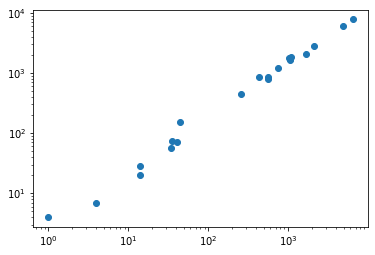

In [50]:
plt.scatter(overview2.loc[(overview2.species =='human') & (overview2.origin == 'human')]['num_up'], overview.loc[(overview2.species =='human') & (overview2.origin == 'human')]['num_up'])

plt.semilogx()
plt.semilogy()
for ct in overview.cell_type.unique

In [47]:
overview2.loc[(overview2.species =='human') & (overview2.origin == 'human')]

,Unnamed: 0,cell_type,origin,species,test,num_up,num_down,num_mixed
0,0,ASC,human,human,lrt,2136,250,102
4,4,ChC,human,human,lrt,4,1,0
8,8,Endo,human,human,lrt,14,3,0
12,12,L2_3_IT,human,human,lrt,6409,1650,859
16,16,L4_5_IT,human,human,lrt,1097,663,263
20,20,L5_6_NP,human,human,lrt,14,14,1
24,24,L5_ET,human,human,lrt,44,88,0
28,28,L5_IT,human,human,lrt,434,335,82
32,32,L6b,human,human,lrt,35,45,3
36,36,L6_CT,human,human,lrt,1028,220,45


In [39]:
# overview.to_csv('../../data/meta/atac_count_species_spec_de.tsv', sep='\t')

Text(0.5, 1.0, 'DE genes in each human cell type')

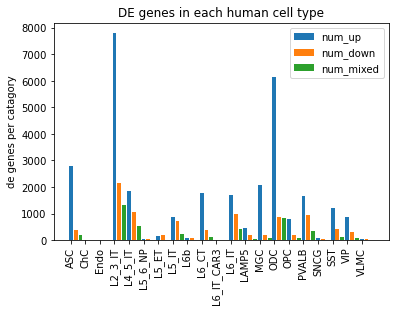

In [40]:
use = overview.loc[(overview.species =='human') & (overview.origin == 'human')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

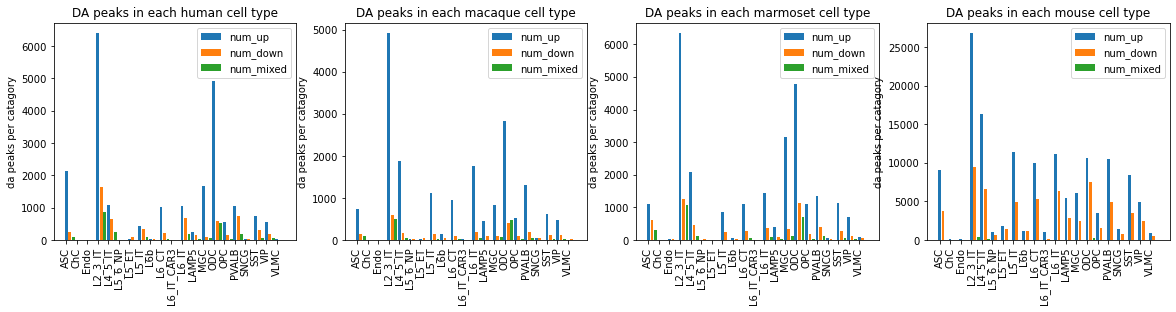

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4) )
axs = axs.flatten()
for specie, ax  in zip(species, axs):
    use = overview.loc[(overview.species ==specie) & (overview.origin == specie)]
    count = 0
    for catagory in ['num_up', 'num_down', 'num_mixed']:
        ax.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
        count+= 1
    ticks = ax.set_xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
    ax.set_ylabel('da peaks per catagory')
    ax.legend()
    ax.set_title(f'DA peaks in each {specie} cell type')

In [41]:
use = overview.loc[(overview.species =='human') & (overview.origin == 'human')]
use['num_up'].sum()

30415

In [ ]:
over

Text(0.5, 1.0, 'DE genes in each human cell type')

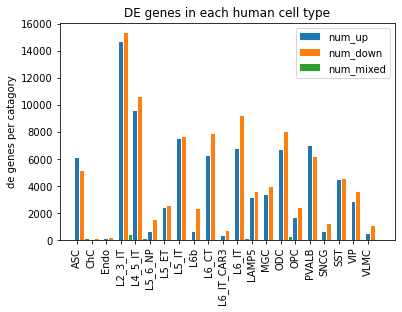

In [24]:
use = overview.loc[(overview.species =='mouse') & (overview.origin == 'human')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

Text(0.5, 1.0, 'DE genes in each human cell type')

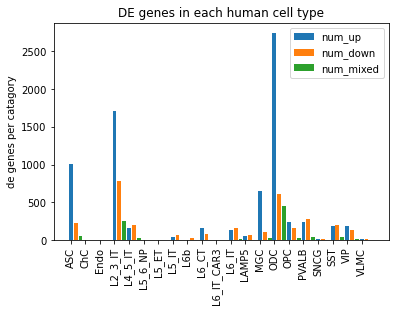

In [25]:
use = overview.loc[(overview.species =='human') & (overview.origin == 'marmoset')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

Text(0.5, 1.0, 'DE genes in each macaque cell type')

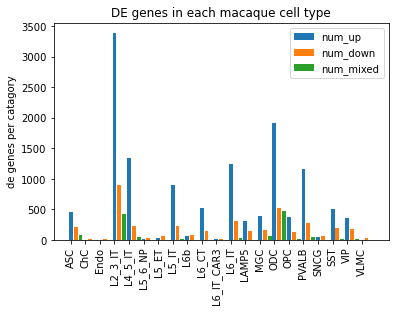

In [26]:
use = overview.loc[(overview.species =='macaque') & (overview.origin == 'human')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each macaque cell type')

Text(0.5, 1.0, 'DE genes in each marmoset cell type')

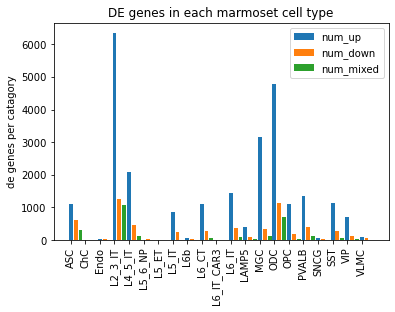

In [27]:
use = overview.loc[(overview.species =='marmoset') & (overview.origin == 'marmoset')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each marmoset cell type')

Text(0.5, 1.0, 'DE genes in each mouse cell type')

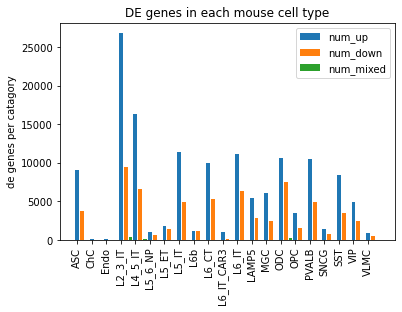

In [28]:
use = overview.loc[(overview.species =='mouse') & (overview.origin == 'mouse')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each mouse cell type')

In [29]:
use_origin = 'mouse'

Text(0.5, 1.0, 'DE genes in each human cell type')

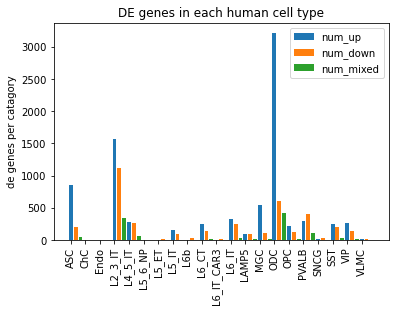

In [30]:
use = overview.loc[(overview.species =='human') & (overview.origin == use_origin)]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

Text(0.5, 1.0, 'DE genes in each macaque cell type')

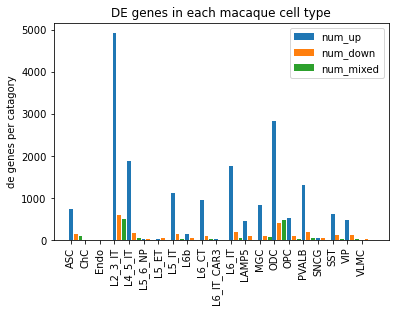

In [31]:
use = overview.loc[(overview.species =='macaque') & (overview.origin == 'macaque')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each macaque cell type')

Text(0.5, 1.0, 'DE genes in each marmoset cell type')

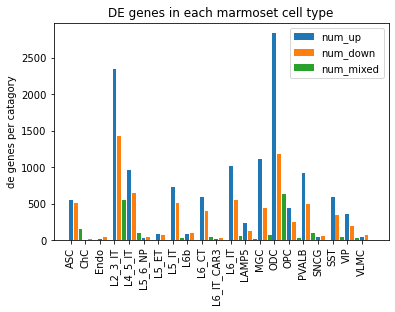

In [32]:
use = overview.loc[(overview.species =='marmoset') & (overview.origin == use_origin)]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each marmoset cell type')

Text(0.5, 1.0, 'DE genes in each mouse cell type')

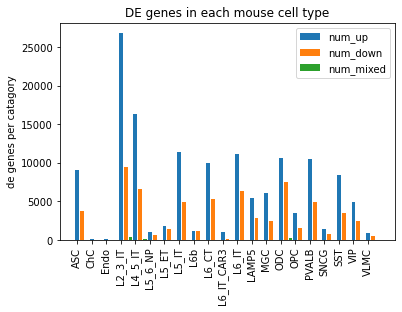

In [33]:
use = overview.loc[(overview.species =='mouse') & (overview.origin == use_origin)]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each mouse cell type')

In [34]:
overview.shape

(336, 7)

# compare to old analysis